Multi-MOdel RAG with langchain

In [1]:
%pip install -Uq "unstructured[all-docs]" pillow lxml pillow
%pip install -Uq chromedb tiktoken
%pip install -Uq langchain langchain-community langchain-openai langchain-groq
%pip install -Uq python_dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 23.2 MB/s e

In [2]:
from dotenv import load_dotenv
load_dotenv()

False

In [4]:
import os

#keys for the services we will use

os.environ["OPENAI_API_KEY"]="sk-..."
os.environ["GROQ_API_KEY"]="sk-..."
os.environ["LANGCHAIN_API_KEY"]="sk-..."
os.environ["LANGCHAIN_TRACING_V2"]="true"

In [5]:
# Install Tesseract OCR and the necessary language data
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-eng # Install English language data (or other languages as needed)

# Add Tesseract to your PATH (this might require restarting your runtime)
import os
os.environ["PATH"] += os.pathsep + "/usr/bin"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,626 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123633 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

Extract the data from the pdf. The data may be in the form of Text, Images, Tables etc..


In [6]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (152 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123680 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [8]:
from unstructured.partition.pdf import partition_pdf


output_path= "/content/"
file_path = output_path + "Indian National Movement.pdf"

chunks = partition_pdf(
    filename=file_path,
    infer_table_structure= True, strategy="hi_res",
    extract_image_block_types=["Image"],

    extract_image_block_to_payload=True,

    chunking_strategy="by_title",
    max_characters=10000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000,
    )

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [9]:
len(chunks)

20

In [10]:
chunks[3].metadata.orig_elements

In [11]:
# We get 2 types of elements from the partition_pdf function
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [12]:
# This is what an extracted image looks like.
# It contains the base64 representation only because we set the param extract_image_block_to_payload=True

elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '4449730b-c136-41c1-8ce8-a36dd7230cf8',
 'text': 'ACTIVITY 8.1',
 'metadata': {'detection_class_prob': 0.8127090334892273,
  'coordinates': {'points': ((180.34988403320312, 996.1771240234375),
    (180.34988403320312, 1099.7269287109375),
    (613.447265625, 1099.7269287109375),
    (613.447265625, 996.1771240234375)),
   'system': 'PixelSpace',
   'layout_width': 1654,
   'layout_height': 2339},
  'last_modified': '2024-12-15T16:14:27',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 5,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABoAbEDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTl

In [13]:
# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [14]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

Check what the images look like

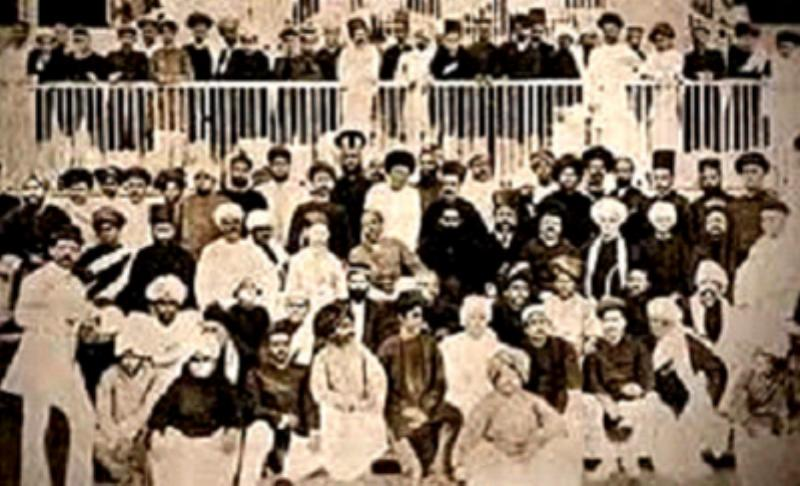

In [15]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_string):
    decoded_image = base64.b64decode(base64_string)
    display(Image(data=decoded_image))

display_base64_image(images[4])

Summarize the Data

we will now create the summary of each element extracted from the PDF. This summary will be vectorized and used in the retrieval process

In [16]:
%pip install -Uq langchain-groq

In [17]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate

from langchain_core.output_parsers import StrOutputParser


In [18]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [19]:
# Summarize text
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 3})

# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html, {"max_concurrency": 3})

In [20]:
%pip install -Uq langchain_openai

In [21]:
!pip install transformers
!pip install pillow

In [24]:

from transformers import pipeline, AutoProcessor, BlipModel, AutoTokenizer
from PIL import Image
import io

# Load the image captioning model, processor, and tokenizer
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipModel.from_pretrained("Salesforce/blip-image-captioning-base")
tokenizer = AutoTokenizer.from_pretrained("Salesforce/blip-image-captioning-base") # Load the tokenizer


image_summaries = [""]* len(images)

`BlipModel` is going to be deprecated in future release, please use `BlipForConditionalGeneration`, `BlipForQuestionAnswering` or `BlipForImageTextRetrieval` depending on your usecase.
Some weights of BlipModel were not initialized from the model checkpoint at Salesforce/blip-image-captioning-base and are newly initialized: ['logit_scale', 'text_model.embeddings.LayerNorm.bias', 'text_model.embeddings.LayerNorm.weight', 'text_model.embeddings.position_embeddings.weight', 'text_model.embeddings.word_embeddings.weight', 'text_model.encoder.layer.0.attention.output.LayerNorm.bias', 'text_model.encoder.layer.0.attention.output.LayerNorm.weight', 'text_model.encoder.layer.0.attention.output.dense.bias', 'text_model.encoder.layer.0.attention.output.dense.weight', 'text_model.encoder.layer.0.attention.self.key.bias', 'text_model.encoder.layer.0.attention.self.key.weight', 'text_model.encoder.layer.0.attention.self.query.bias', 'text_model.encoder.layer.0.attention.self.query.weight', 'text_mo

In [25]:
pip install chromadb

In [26]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

<ipython-input-26-acdcec3e4a1a>:9: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())
<ipython-input-26-acdcec3e4a1a>:9: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())


In [27]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-.... You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [29]:
!pip install -Uq sentence-transformers

import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# Use SentenceTransformerEmbeddings instead of OpenAIEmbeddings
embedding_function = SentenceTransformerEmbeddings(model_name="all-mpnet-base-v2")

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=embedding_function)

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)


In [30]:

doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables - Check if there are tables before adding
if tables:  # Only add tables if the 'tables' list is not empty
    table_ids = [str(uuid.uuid4()) for _ in tables]
    summary_tables = [
        Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
    ]
    retriever.vectorstore.add_documents(summary_tables)
    retriever.docstore.mset(list(zip(table_ids, tables)))
else:
    print("No tables found in the document. Skipping table addition.")  # Print a message to indicate skipping table addition

# Add image summaries - Changes needed here to describe images
#img_ids = [str(uuid.uuid4()) for _ in images]
# Use describe_image_hf or another method to generate text descriptions for images
#image_descriptions = [describe_image_hf(image) for image in images]  # Assuming you have describe_image_hf defined
#summary_img = [
 #   Document(page_content=description, metadata={id_key: img_ids[i]}) for i, description in enumerate(image_descriptions)
#]
#retriever.vectorstore.add_documents(summary_img)
#retriever.docstore.mset(list(zip(img_ids, images)))

No tables found in the document. Skipping table addition.


In [31]:
# Retrieve
docs = retriever.invoke(
    "who are the authors of the paper?"
)

In [32]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

8.1.1 Rise of Nationalism in India

For India, the making of national identity was a long process whose roots can be drawn from the ancient era. India as a whole had been ruled by emperors like Ashoka and Samudragupta in ancient times and Akbar to Aurangzeb in Medieval times. But, it was only in the 19" Century that the concept of a national identity and national consciousness emerged. This growth was intimately connected to the anti-colonial movement about which you have already read in lesson 4. The social, economic and political factors had inspired the people to define and achieve their national identity. People began discovering their unity in the process of their struggle against colonialism.

The sense of being oppressed under colonial rule provided a shared bond that tied different groups together. Each class and group felt the effects of colonialism differently. Their experiences were varied, and their notions of freedom were not always the same. Several other causes also cont

In [33]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables.
    Context: {context_text}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]



    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o-mini")
        | StrOutputParser()
    )
)

In [34]:
!pip install -Uq transformers accelerate bitsandbytes

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain import HuggingFacePipeline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chromadb 0.5.23 requires tokenizers<=0.20.3,>=0.13.2, but you have tokenizers 0.21.0 which is incompatible.


In [37]:

# Load the tokenizer and model using the 'trust_remote_code=True' argument
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-350m", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m", trust_remote_code=True)

# Create a text generation pipeline
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,  # we can Adjust as needed
)


In [38]:
# Create a LangChain HuggingFacePipeline object
llm = HuggingFacePipeline(pipeline=pipe)

In [39]:
# Inside the build_prompt function:
def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            # Check if text_element has a 'text' attribute before accessing it
            if hasattr(text_element, 'text'):
                context_text += text_element.text
            else:
                # If not, handle it appropriately, e.g., print a warning or skip it
                print(f"Warning: Text element {text_element} does not have a 'text' attribute.")

In [40]:
# Inside the build_prompt function:
def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            # Check if text_element has a 'text' attribute before accessing it
            if hasattr(text_element, 'text'):
                context_text += text_element.text
            else:
                # If not, handle it appropriately, e.g., print a warning or skip it
                print(f"Warning: Text element {text_element} does not have a 'text' attribute.")

    # Construct the prompt with context
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    # Define prompt_content with the prompt template
    # TRUNCATE THE CONTEXT IF IT'S TOO LONG
    max_context_length = 2048  # Adjust this value based on your model's limitations
    context_text = context_text[:max_context_length]
    prompt_content = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    # Instead of ChatOpenAI, use your local LLM:
    return prompt_content  # Return the prompt_content

In [43]:
# Inside the build_prompt function:
def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            # Check if text_element has a 'text' attribute before accessing it
            if hasattr(text_element, 'text'):
                context_text += text_element.text
            else:
                # If not, handle it appropriately, e.g., print a warning or skip it
                print(f"Warning: Text element {text_element} does not have a 'text' attribute.")

    # Construct the prompt with context (including images)
    # TRUNCATE THE CONTEXT IF IT'S TOO LONG
    max_context_length = 512  # Reduced from 2048 to 512
    context_text = context_text[:max_context_length]
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    # Instead of ChatOpenAI, use your local LLM:
    return prompt_template  # Return the prompt_template

In [44]:

# Modify the chain to use the local LLM:
chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | llm  # Use the HuggingFacePipeline object
    | StrOutputParser()
)

In [46]:
!pip install transformers
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain import HuggingFacePipeline
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser


In [48]:

def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    tokenizer = AutoTokenizer.from_pretrained("facebook/opt-350m", trust_remote_code=True)

    # Limiting the number of text elements considered
    max_text_elements = 2  # Adjust this value if needed
    for text_element in docs_by_type["texts"][:max_text_elements]:
        if hasattr(text_element, 'text'):
            # Limiting the length of each text element by tokens
            tokens = tokenizer.encode(text_element.text, add_special_tokens=False)
            max_element_length = 256  # Adjust this value if needed
            truncated_tokens = tokens[:max_element_length]
            truncated_text = tokenizer.decode(truncated_tokens)
            context_text += truncated_text + " "
        else:
            print(f"Warning: Text element {text_element} does not have a 'text' attribute.")

    # Construct the prompt
    prompt_template = f"""
    Answer the question based only on the following context:
    Context: {context_text}
    Question: {user_question}
    """

    # Truncate the entire prompt if it exceeds the maximum token limit
    prompt_tokens = tokenizer.encode(prompt_template, add_special_tokens=False)
    max_prompt_length = 512  # Total token limit for prompt and context
    if len(prompt_tokens) > max_prompt_length:
        prompt_tokens = prompt_tokens[:max_prompt_length]
        prompt_template = tokenizer.decode(prompt_tokens)

    return prompt_template


In [50]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain import HuggingFacePipeline
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser

def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    tokenizer = AutoTokenizer.from_pretrained("facebook/opt-350m", trust_remote_code=True)

    # Limiting the number of text elements considered
    max_text_elements = 2  # Adjust this value if needed
    for text_element in docs_by_type["texts"][:max_text_elements]:
        if hasattr(text_element, 'text'):
            # Limiting the length of each text element by tokens
            tokens = tokenizer.encode(text_element.text, add_special_tokens=False)
            max_element_length = 256  # Adjust this value if needed
            truncated_tokens = tokens[:max_element_length]
            truncated_text = tokenizer.decode(truncated_tokens)
            context_text += truncated_text + " "
        else:
            print(f"Warning: Text element {text_element} does not have a 'text' attribute.")

    # Construct the prompt
    prompt_template = f"""
    Answer the question based only on the following context:
    Context: {context_text}
    Question: {user_question}
    """

    # Truncate the entire prompt if it exceeds the maximum token limit
    prompt_tokens = tokenizer.encode(prompt_template, add_special_tokens=False)
    max_prompt_length = 512  # Total token limit for prompt and context
    if len(prompt_tokens) > max_prompt_length:
        prompt_tokens = prompt_tokens[:max_prompt_length]
        prompt_template = tokenizer.decode(prompt_tokens)

    return prompt_template

# Assuming the following are defined as in your previous code:
# retriever
# parse_docs
# ...

# Load the tokenizer and model using the 'trust_remote_code=True' argument
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-350m", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m", trust_remote_code=True)

# Create a text generation pipeline
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,  # Adjust as needed
)

# Create a LangChain HuggingFacePipeline object
# Enforce token limit within the pipeline as well
llm = HuggingFacePipeline(pipeline=pipe, model_kwargs={"max_length": 512})

chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | llm  # Use the HuggingFacePipeline object
    | StrOutputParser()
)


In [51]:
response = chain.invoke(
    "Explain the rise of radical nationalists?"
)
print(response)


    Answer the question based only on the following context:
    Context: SOCIAL SCIENCE

1

MODULE

India and the World through Ages

Notes

| 171 |

1

MODULE

India and the World through Ages

Notes

a

8.4 THE RISE OF RADICAL NATIONALISTS

The mild policies of the Moderates in the Congress led to the rise of passionate, radical nationalists, who came to be called the ‘Garam Dal’. Thus the first phase of the nationalist movement came to an end with government reaction against the Congress on the one hand and a split in the Congress in 1907 on the other. That is why the period after 1905 till 1918 can be referred to as the ‘Era of Passionate Nationalists or Garam Dal’. Lala Lajpat Rai, Bal Gangadhar Tilak and Bipin Chandra Pal (Lal-Bal-Pal) were important leaders of this Radical group. When the Moderates were in the forefront of the action, they had maintained a low profile but now they swung into action. Their entry marked the beginning of a new trend and a new face in India’s stru

In [53]:
response = chain.invoke(
    "Explain the development of social ideas?"
)

print("Response:", response)

Response: 
    Answer the question based only on the following context:
    Context: 8.1.1 Rise of Nationalism in India

For India, the making of national identity was a long process whose roots can be drawn from the ancient era. India as a whole had been ruled by emperors like Ashoka and Samudragupta in ancient times and Akbar to Aurangzeb in Medieval times. But, it was only in the 19" Century that the concept of a national identity and national consciousness emerged. This growth was intimately connected to the anti-colonial movement about which you have already read in lesson 4. The social, economic and political factors had inspired the people to define and achieve their national identity. People began discovering their unity in the process of their struggle against colonialism.

The sense of being oppressed under colonial rule provided a shared bond that tied different groups together. Each class and group felt the effects of colonialism differently. Their experiences were varied, 

In [54]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [55]:
pip install pyngrok

In [56]:
import streamlit as st
from pyngrok import ngrok, conf
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser


NGROK_AUTH_TOKEN = "2qFef6TzzJkf44wKiPKrFf6dJjr_5KYty8AZcU2TUKhXL8XSP"  # Replace with your actual authtoken

# Configuring pyngrok to use our authtoken
conf.get_default().auth_token = NGROK_AUTH_TOKEN

# Initializing session state
if 'public_url' not in st.session_state:
  st.session_state.public_url = None

# Start ngrok tunnel
if st.session_state.public_url is None:

  public_url = ngrok.connect("http://localhost:8501")
  st.session_state.public_url = public_url

# Display public URL in sidebar
st.sidebar.info(f"Public URL: {st.session_state.public_url}")

# Streamlit UI
st.title("PDF Question Answering")

# Input field for user question
user_question = st.text_input("Ask a question about the PDF:")

# Button to trigger the question answering process
if st.button("Get Answer"):
    # to Call the chain to get the answer
    response = chain.invoke(user_question)

    # to Display the answer
    st.write("Answer:", response)


import atexit #Import the atexit module
atexit.register(lambda: ngrok.kill())

2024-12-15 17:32:13.072 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 17:32:13.075 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-12-15 17:32:13.077 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 17:32:13.087 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 17:32:13.091 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2024-12-15 17:32:17.761 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 17:32:17.767 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 17:32:17.769 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 17:32:17.777 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 17:32:17.949 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-15 17:32:17.952 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when 

<function __main__.<lambda>()>

In [82]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.198.105.23:8501

stop
run
  Stopping...
  Stopping...


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.198.105.23:8501

stop
run
  Stopping...
  Stopping...


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.81.118.123:8501

false
stop


In [57]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py --pdf_path "/content/Indian National Movement.pdf"

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: No such option: --pdf_path
